Analizziamo i vari dati, per trovare le settimane:
/Users/robertagalici/Desktop/EdnetReal/data/Dati_Moodle/Nuovi/logs_EGA - Programmazione e Controllo_20210610-1603.csv
In questo csv, abbiamo gli utenti e le loro interazioni. 
Es. 
utente: firstaname_17566 lastname_17566 il 4 febbraio 2021 dalle 13 fino alle 14.44 interagisce con una serie di lezioni. Lo stesso utente, utilizza la piattaforma anche il 19 gennaio 2021, il 1 gennaio, il 7 maggio 2020. Qua non si parla di settimane di lezione, sono giornate in cui l'utente interagisce con la piattaforma


In quante settimane diverse ha interagito un utente -> Dati_Moodle/Nuovi/
Prendiamo un corso, in un altro notebook, vediamo in quante settimane diverse troviamo un'interazione dell'utente
ho il timestamp, passare da quello alla week -> da data a week of the year 
Aggiungi una colonna al dataframe che rappresenta la week
usare drop_duplicates con subset userid e settimana, keep=first
group by usando come subset userid
Poi fare la somma
Se fai max -> ultima settimana in cui ha interagito l'utente
min -> indice prima settimana in cui ha interagito
Per ogni utente, vogliamo userid, indice prima sett, indice ultima sett e conteggio di quante settimane (totale)

In [12]:
import matplotlib.pyplot as plt
import datetime
from datetime import date
from tqdm import tqdm
import pandas as pd
import numpy as np
import glob
import os

path = '/Users/robertagalici/Desktop/EdnetReal/data/Dati_Moodle/Nuovi/'

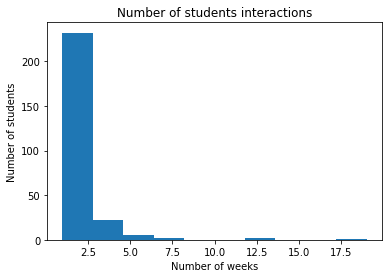

In [80]:
header = ['timestamp', 'user_id', 'user_involved', 'context', 'component', 'event', 'description', 'origin', 'ip']


for fname in os.listdir(path):
    if not fname.endswith(".csv"):
        continue
    df = pd.read_csv(os.path.join(path, fname), sep=',', encoding='utf-8')
    df.columns = header
    
    # controllo da fare per ogni riga
    
    # trasformare il timestamp in week of the year: es. 12/01/2021 -> 2 -> seconda settimana dell'anno
    date_time = pd.to_datetime(df["timestamp"])

    # aggiungo colonna al dataframe
    df['week_of_year'] = date_time.dt.isocalendar().week

    df = df.drop_duplicates(subset =['user_id', 'week_of_year'], keep = 'first')
    
    #print(df.groupby(by=["user_id"]).size())
    # per ogni studente calcolare il numero di settimane differenti in cui ha almeno un'interazione e poi plot
    # istogramma
    # studente, numero settimane differenti -> per un corso
    #  groupby del dataframe di df per utente, 
    # plot degli studenti che hanno completato almeno il 50% delle attività del corso di statistica
    
    # modificare df
    df_mod = df.groupby(by=["user_id"]).size().values
    
    
    plt.hist(df_mod, bins=10)
    plt.title("Number of students interactions")
    plt.xlabel("Number of weeks")
    plt.ylabel("Number of students")
    plt.show()
    break
    
    
    #df.groupby(by=["user_id"]).sum()
    #df.groupby(by=["user_id"]).max()
    #df.groupby(by=["user_id"]).min()
        
        
    